In [ ]:
"""This Python script is used for facial recognition. It uses the face_recognition library to
do the job. The face_recognition library recognizes faces by generating different encodings for 
known face and unknown face (and comparing it)."""

In [1]:
!pip install face_recognition

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

In [66]:
"""This function takes in an image and reshapes it"""
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width,height))

In [2]:
"""The known_dir contains images of Donald Trump, Tom Hanks, Tom Cruise, Leonardo Di Caprio and
Ranbir Kapoor"""

'The known_dir contains images of Donald Trump, Tom Hanks, Tom Cruise, Leonardo Di Caprio and\nRanbir Kapoor'

In [67]:
known_encodings = [] # This list stores the encodings of the known faces.
known_names = [] # This list stores the names of different personalities in the known_dir.
known_dir = "/content/drive/MyDrive/known" # Known directory path

In [68]:
"""The for loop computes the encodings of the images in the known_dir folder and appends it to
the known_encodings list. It also appends names of the personalities into the know_names
list"""
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

In [69]:
len(known_encodings)

5

In [3]:
"""The unknown_dir contains the images of Tom Cruise, Roger Federer, Rafael Nadal and 
Donald Trump"""

'The unknown_dir contains the images of Tom Cruise, Roger Federer, Rafael Nadal and \nDonald Trump'

In [70]:
unknown_dir = "/content/drive/MyDrive/unknown"

In [71]:
"""The code given below computes the encodings of the images in the unknown folder and then
compares the unkown_images with the known_images and outputs the names of the person(if the
comparison is true)"""
for file in os.listdir(unknown_dir):
  print("Proocessing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)
  for i in range(len(results)):
      if results[i]:
          print(known_names[i])




Proocessing 1.jpg
Tom
Proocessing 2.jpg
Proocessing 3.jpg
Proocessing 4.jpg
donald


Proocessing 1.jpg


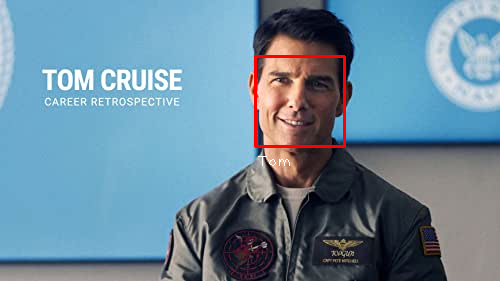

Proocessing 2.jpg
Proocessing 3.jpg
Proocessing 4.jpg


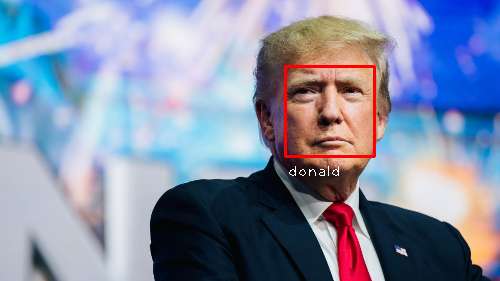

In [72]:
"""The following code outputs the detected face and the names of the images(after comparing 
it with known images) in the unknown folder"""
for file in os.listdir(unknown_dir):
  print("Proocessing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)
  for i in range(len(results)):
      if results[i]:
          name = (known_names[i])
          (top, right, bottom, left) = face_recognition.face_locations(img)[0]
          cv2.rectangle(img, (left, top), (right,bottom), (0, 0, 255), 2)
          cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
          cv2_imshow(img)